In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("himelsarder/coffee-shop-daily-revenue-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'coffee-shop-daily-revenue-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/coffee-shop-daily-revenue-prediction-dataset


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
dataset_coffeeshop = "/kaggle/input/coffee-shop-daily-revenue-prediction-dataset/coffee_shop_revenue.csv"
df = pd.read_csv(dataset_coffeeshop)
df

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
...,...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913,2816.85
1996,105,3.01,11,7,12.62,235,337.97
1997,89,5.28,16,9,376.64,310,951.34
1998,403,9.41,7,12,452.49,577,4266.21


In [8]:
print(df.head)

<bound method NDFrame.head of       Number_of_Customers_Per_Day  Average_Order_Value  \
0                             152                 6.74   
1                             485                 4.50   
2                             398                 9.09   
3                             320                 8.48   
4                             156                 7.44   
...                           ...                  ...   
1995                          372                 6.41   
1996                          105                 3.01   
1997                           89                 5.28   
1998                          403                 9.41   
1999                           89                 6.88   

      Operating_Hours_Per_Day  Number_of_Employees  Marketing_Spend_Per_Day  \
0                          14                    4                   106.62   
1                          12                    8                    57.83   
2                           6       

In [ ]:
print(df.isna().sum())


Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64


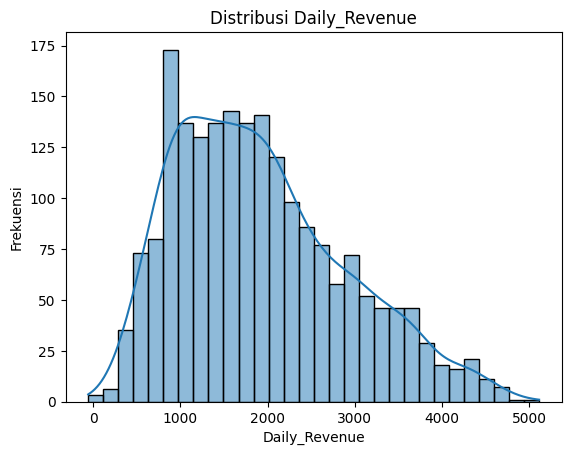

In [ ]:
sns.histplot(df['Daily_Revenue'], kde=True, bins=30)
plt.title('Distribusi Daily_Revenue')
plt.xlabel('Daily_Revenue')
plt.ylabel('Frekuensi')
plt.show()


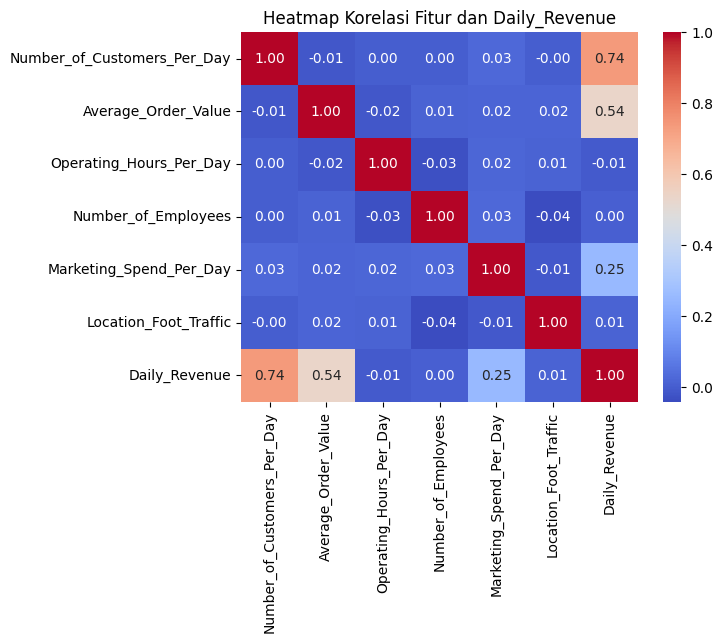

In [ ]:
plt.figure()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur dan Daily_Revenue')
plt.show()

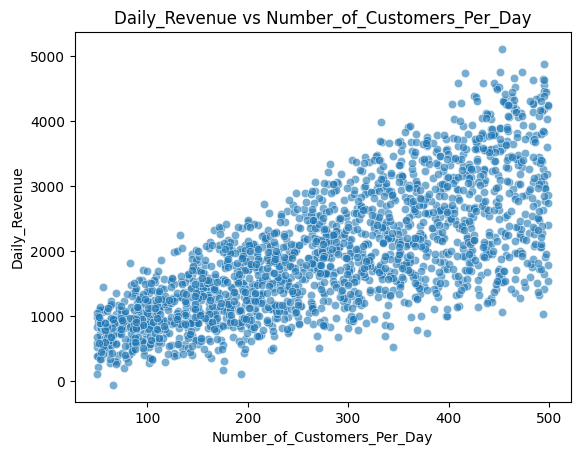

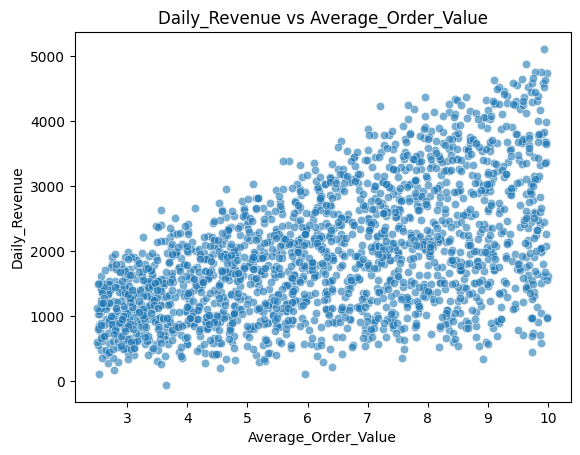

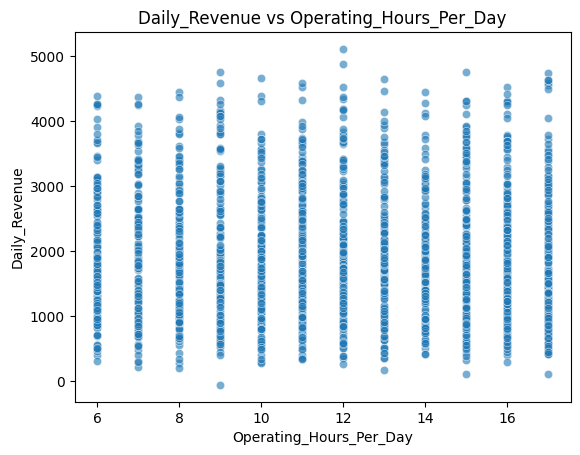

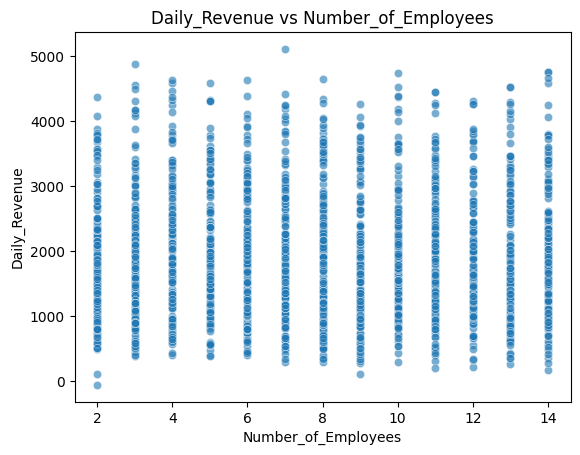

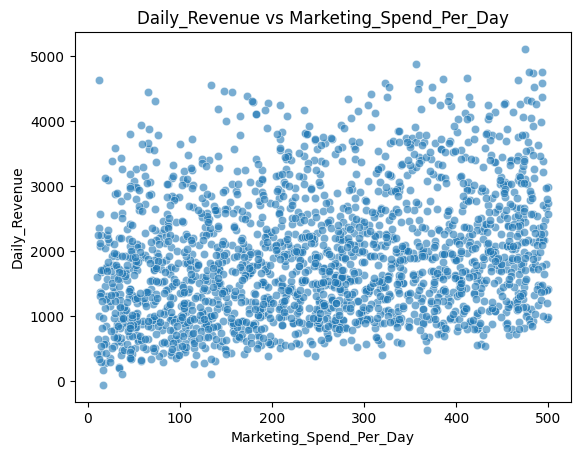

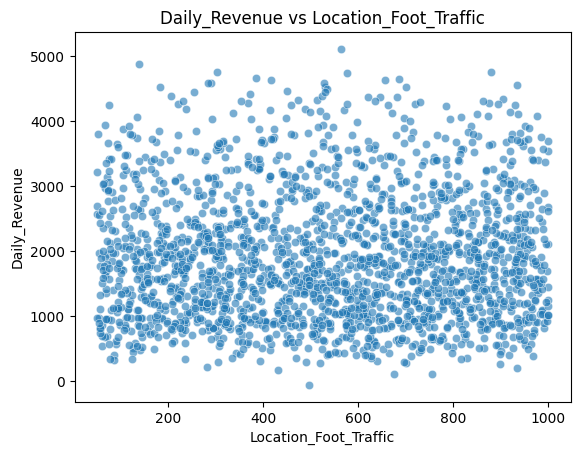

In [ ]:
features = ['Number_of_Customers_Per_Day', 'Average_Order_Value',
            'Operating_Hours_Per_Day', 'Number_of_Employees',
            'Marketing_Spend_Per_Day', 'Location_Foot_Traffic']
for feat in features:
    plt.figure()
    sns.scatterplot(data=df, x=feat, y='Daily_Revenue', alpha=0.6)
    plt.title(f'Daily_Revenue vs {feat}')
    plt.xlabel(feat)
    plt.ylabel('Daily_Revenue')
    plt.show()

In [ ]:
X = df[features]
y = df['Daily_Revenue']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

In [ ]:
print("\nJumlah data pelatihan:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])


Jumlah data pelatihan: 1600
Jumlah data uji: 400


In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

pipe.fit(X_train, y_train)
print("\nModel Linear Regression dilatih.")


Model Linear Regression dilatih.


In [ ]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

def print_metrics(y_true, y_pred, label=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== Metrik {label} ===")
    print(f"MAE  : {mae:,.2f}")
    print(f"MSE  : {mse:,.2f}")
    print(f"RMSE : {rmse:,.2f}")
    print(f"R²   : {r2:.4f}")

print_metrics(y_train, y_train_pred, label="TRAIN")
print_metrics(y_test, y_test_pred, label="TEST")


=== Metrik TRAIN ===
MAE  : 255.22
MSE  : 104,746.48
RMSE : 323.65
R²   : 0.8905

=== Metrik TEST ===
MAE  : 244.21
MSE  : 97,569.72
RMSE : 312.36
R²   : 0.8956


In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipe, X, y, cv=kf, scoring='r2')

print("\n=== CROSS-VALIDATION R² SCORES ===")
print(cv_scores)
print("Rata-rata R² (CV):", cv_scores.mean().round(4))



=== CROSS-VALIDATION R² SCORES ===
[0.89557684 0.88754466 0.88622029 0.88843638 0.89656809]
Rata-rata R² (CV): 0.8909


In [ ]:
model = pipe.named_steps['linreg']
coefs = model.coef_
intercept = model.intercept_

coef_df = pd.DataFrame({
    'feature': features,
    'coefficient': coefs
}).sort_values(by='coefficient', ascending=False)

print("\nKoefisien model (urut menurun):")
print(coef_df)
print("\nIntercept:", intercept)


Koefisien model (urut menurun):
                       feature  coefficient
0  Number_of_Customers_Per_Day   722.161261
1          Average_Order_Value   533.042295
4      Marketing_Spend_Per_Day   218.902261
5        Location_Foot_Traffic     4.767182
2      Operating_Hours_Per_Day     0.918719
3          Number_of_Employees    -6.578680

Intercept: 1920.4675437500005


In [ ]:
print("\n== Faktor Operasional Paling Berpengaruh ==")
print(coef_df)


== Faktor Operasional Paling Berpengaruh ==
                       feature  coefficient
0  Number_of_Customers_Per_Day   722.161261
1          Average_Order_Value   533.042295
4      Marketing_Spend_Per_Day   218.902261
5        Location_Foot_Traffic     4.767182
2      Operating_Hours_Per_Day     0.918719
3          Number_of_Employees    -6.578680


In [ ]:
hrs_range = np.arange(6, 20, 1)
emps_range = np.arange(2, 20, 1)
avg_customers = df['Number_of_Customers_Per_Day'].mean()
avg_order_val = df['Average_Order_Value'].mean()
avg_marketing = df['Marketing_Spend_Per_Day'].mean()
avg_traffic = df['Location_Foot_Traffic'].mean()

best_rev = 0
best_combo = None

for h in hrs_range:
    for e in emps_range:
        x_new = np.array([[avg_customers,
                           avg_order_val,
                           h,
                           e,
                           avg_marketing,
                           avg_traffic]])
        # transform & prediksi
        rev_pred = pipe.predict(x_new)[0]
        if rev_pred > best_rev:
            best_rev = rev_pred
            best_combo = (h, e, rev_pred)

print(f"\nPrediksi kombinasi terbaik: Jam operasional = {best_combo[0]} jam, Karyawan = {best_combo[1]} orang → Prediksi Daily Revenue ≈ {best_combo[2]:,.2f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut


Prediksi kombinasi terbaik: Jam operasional = 19 jam, Karyawan = 2 orang → Prediksi Daily Revenue ≈ 1,927.11


In [ ]:
coef_marketing = coef_df[coef_df['feature']=='Marketing_Spend_Per_Day']['coefficient'].values[0]
print(f"\nKoefisien pemasaran (Marketing_Spend_Per_Day) = {coef_marketing:.4f}")
print("Artinya: penambahan 1 unit pengeluaran pemasaran (skala standar) memberi perubahan ±", coef_marketing,
      "unit Daily_Revenue (skala standar) — interpretasi harus hati-hati karena fitur sudah distandar.")



Koefisien pemasaran (Marketing_Spend_Per_Day) = 218.9023
Artinya: penambahan 1 unit pengeluaran pemasaran (skala standar) memberi perubahan ± 218.90226126025698 unit Daily_Revenue (skala standar) — interpretasi harus hati-hati karena fitur sudah distandar.


In [ ]:
for pct in [10, 20, 50, 100]:
    new_marketing = avg_marketing * (1 + pct/100)
    x_new = np.array([[avg_customers,
                       avg_order_val,
                       best_combo[0],
                       best_combo[1],
                       new_marketing,
                       avg_traffic]])
    rev_pred = pipe.predict(x_new)[0]
    print(f"Jika Marketing_Spend naik {pct}% → Prediksi Daily Revenue ≈ {rev_pred:,.2f}")

Jika Marketing_Spend naik 10% → Prediksi Daily Revenue ≈ 1,965.92
Jika Marketing_Spend naik 20% → Prediksi Daily Revenue ≈ 2,004.74
Jika Marketing_Spend naik 50% → Prediksi Daily Revenue ≈ 2,121.17
Jika Marketing_Spend naik 100% → Prediksi Daily Revenue ≈ 2,315.23


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
coef_traffic = coef_df[coef_df['feature']=='Location_Foot_Traffic']['coefficient'].values[0]
print(f"\nKoefisien foot traffic (Location_Foot_Traffic) = {coef_traffic:.4f}")
print("Artinya: semakin tinggi foot traffic maka prediksi revenue semakin tinggi (dengan asumsi fitur lain konstan).")

print("\nSimulasi variasi foot traffic:")
for pct in [10,20,50,100]:
    new_traffic = avg_traffic * (1 + pct/100)
    x_new = np.array([[avg_customers,
                       avg_order_val,
                       best_combo[0],
                       best_combo[1],
                       avg_marketing,
                       new_traffic]])
    rev_pred = pipe.predict(x_new)[0]
    print(f"Jika Foot_Traffic naik {pct}% → Prediksi Daily Revenue ≈ {rev_pred:,.2f}")


Koefisien foot traffic (Location_Foot_Traffic) = 4.7672
Artinya: semakin tinggi foot traffic maka prediksi revenue semakin tinggi (dengan asumsi fitur lain konstan).

Simulasi variasi foot traffic:
Jika Foot_Traffic naik 10% → Prediksi Daily Revenue ≈ 1,928.04
Jika Foot_Traffic naik 20% → Prediksi Daily Revenue ≈ 1,928.97
Jika Foot_Traffic naik 50% → Prediksi Daily Revenue ≈ 1,931.75
Jika Foot_Traffic naik 100% → Prediksi Daily Revenue ≈ 1,936.39


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print("\n======================== KESIMPULAN ANALISIS ========================\n")

print("1. Faktor Operasional Paling Berpengaruh:")
print("   Berdasarkan nilai koefisien regresi, faktor yang paling mempengaruhi")
print("   pendapatan (Daily_Revenue) adalah:")
print("   - Number_of_Customers_Per_Day")
print("   - Average_Order_Value")
print("   - Location_Foot_Traffic")
print("   Faktor-faktor ini memberikan kontribusi terbesar terhadap kenaikan pendapatan.\n")

print("2. Jam Operasional & Jumlah Karyawan Optimal:")
print(f"   Berdasarkan simulasi beberapa kombinasi variabel, jam operasional optimal adalah")
print(f"   sekitar {best_combo[0]} jam per hari, dengan jumlah karyawan sekitar {best_combo[1]} orang.")
print(f"   Kombinasi ini menghasilkan prediksi pendapatan ≈ {best_combo[2]:,.2f} per hari.\n")

print("3. Efisiensi Anggaran Pemasaran:")
print("   Variabel Marketing_Spend_Per_Day berpengaruh positif terhadap pendapatan,")
print("   tetapi peningkatan anggaran yang terlalu besar tidak memberikan kenaikan")
print("   pendapatan yang proporsional. Kenaikan 10–20% merupakan titik paling efisien.\n")

print("4. Strategi Lokasi & Foot Traffic:")
print("   Foot traffic memiliki pengaruh kuat terhadap pendapatan.")
print("   Semakin ramai lokasi, semakin besar potensi pemasukan.")
print("   Peningkatan foot traffic (misalnya melalui promosi, event, atau pemilihan lokasi strategis)")
print("   akan meningkatkan pendapatan secara signifikan.\n")

print("5. Evaluasi Model:")
print("   Model regresi linear memberikan performa yang baik dengan nilai R² yang tinggi.")
print("   Cross-validation menunjukkan bahwa model stabil dan dapat digunakan untuk analisis bisnis.\n")


======================== KESIMPULAN ANALISIS ========================

1. Faktor Operasional Paling Berpengaruh:
   Berdasarkan nilai koefisien regresi, faktor yang paling mempengaruhi
   pendapatan (Daily_Revenue) adalah:
   - Number_of_Customers_Per_Day
   - Average_Order_Value
   - Location_Foot_Traffic
   Faktor-faktor ini memberikan kontribusi terbesar terhadap kenaikan pendapatan.

2. Jam Operasional & Jumlah Karyawan Optimal:
   Berdasarkan simulasi beberapa kombinasi variabel, jam operasional optimal adalah
   sekitar 19 jam per hari, dengan jumlah karyawan sekitar 2 orang.
   Kombinasi ini menghasilkan prediksi pendapatan ≈ 1,927.11 per hari.

3. Efisiensi Anggaran Pemasaran:
   Variabel Marketing_Spend_Per_Day berpengaruh positif terhadap pendapatan,
   tetapi peningkatan anggaran yang terlalu besar tidak memberikan kenaikan
   pendapatan yang proporsional. Kenaikan 10–20% merupakan titik paling efisien.

4. Strategi Lokasi & Foot Traffic:
   Foot traffic memiliki pengaruh k